In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import io

RANDOM_SEED = 0xdeadbeef
%config InlineBackend.figure_formats = ['svg']

cmap_scatter =plt.colormaps['tab10']
cmap= mpl.colors.ListedColormap(['red', 'blue'])

# Task 1: Train and Fine-tune a Decision Tree (2 points)
1. Generate a synthetic non-linearly separable dataset

In [2]:
from sklearn import datasets
X, y = datasets.make_moons(n_samples=10000, noise=0.4, random_state=RANDOM_SEED)

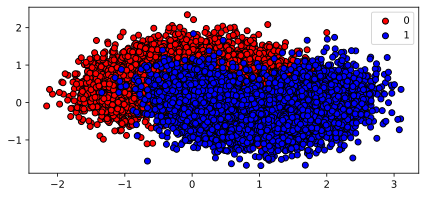

In [3]:
fig, ax = plt.subplots(figsize=(7, 3))
for i, cn in enumerate([0,1]):
    ax.scatter(X[y==i][:, 0],X[y==i][:, 1],
                         label=i,
                         color=cmap(i),
               edgecolor="k"
              )
ax.legend()
plt.show()

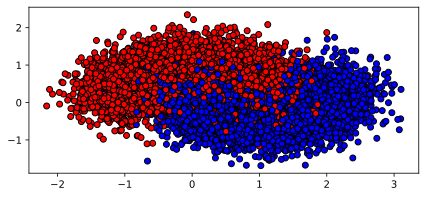

In [4]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.scatter(X[:, 0],X[:, 1], c=y, cmap=cmap,edgecolor="k")
plt.show()

2. Split into train- and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)

3. Use grid search with 5 fold cross-validation (with the help of the GridSearchCV class in scikit-learn) to find good hyperparameter values for a DecisionTreeClassifier  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

4. Train the model on the full training set using these hyperparameters, and measure its accuracy on the test set. You should get roughly 85% to 87% accuracy. Note that the GridSearchCV in scikit learn by default executes the hyperparameter search using cross validation. In the end it fits the final model using the best set of hyperparameters on the full training set.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [25]:
# Some code skeleton to get you started:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
params = {
    "max_depth":[2, 5, 10, 15],
    "min_samples_leaf": [10, 50, 100, 200]
    
}

# Create a GridSearchCV object with cross-validation
# You can adjust the number of cross-validation folds (cv) as needed
grid_search = GridSearchCV(estimator=dt_classifier, cv=5, param_grid=params)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(best_params)
print(classification_report(y_test, y_pred))
# print(classification_report)

{'max_depth': 10, 'min_samples_leaf': 50}
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1241
           1       0.85      0.86      0.86      1259

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



5. Visualise the learned decision boundary.

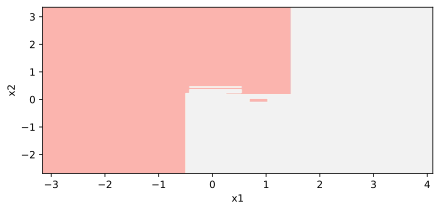

In [26]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(figsize=(7, 3))
DecisionBoundaryDisplay.from_estimator(
        best_model,
        X,
        grid_resolution=300,
        cmap=plt.cm.Pastel1,
        response_method="predict",
        ax=ax,
        xlabel="x1",
        ylabel="x2",
    )

# ax.scatter(X[:, 0],X[:, 1], c=y, cmap=cmap, alpha=0.2)

plt.show()

scikit-learn also provides some nice helper functions to visualize Decision Trees.

One of those functions is `sklearn.tree.export_text` which returns a string representation of the decisions.
Have a look at the print-out of the decision tree below and the plot of its decisions on our `x1` and `x2` above.

In [27]:
from sklearn.tree import export_text

print(export_text(best_model, decimals=3))

|--- feature_1 <= 0.224
|   |--- feature_0 <= -0.494
|   |   |--- feature_0 <= -0.832
|   |   |   |--- feature_0 <= -0.978
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.978
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.832
|   |   |   |--- feature_0 <= -0.615
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.615
|   |   |   |   |--- class: 0
|   |--- feature_0 >  -0.494
|   |   |--- feature_1 <= -0.094
|   |   |   |--- feature_1 <= -0.398
|   |   |   |   |--- feature_1 <= -0.619
|   |   |   |   |   |--- feature_1 <= -0.779
|   |   |   |   |   |   |--- feature_0 <= 0.863
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.863
|   |   |   |   |   |   |   |--- feature_0 <= 1.115
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  1.115
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.779
|   |   |   |   |   |   |--- feature_0 <= 1.060
|

It also provides `plot_tree` which will create a nice graph representation of the classifier - even when it is very wide in thise case:

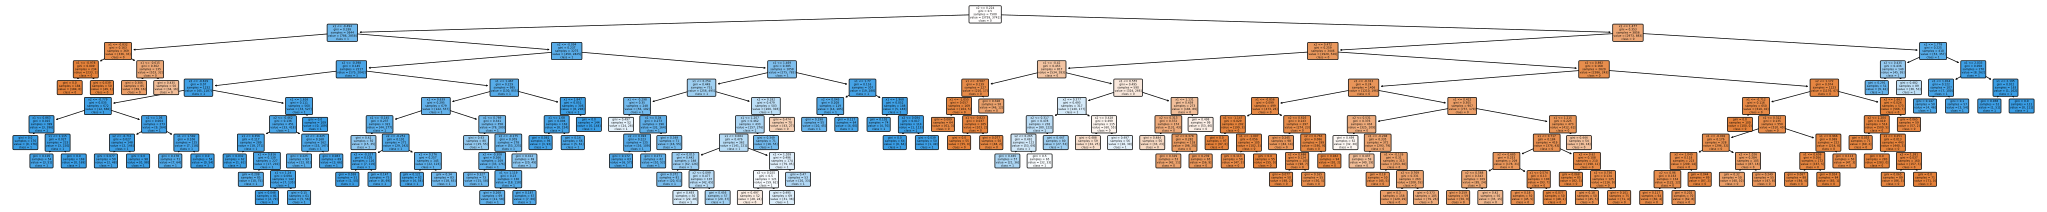

In [28]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(50, 5))
tree.plot_tree(best_model,
              feature_names=["x1", "x2"],
        class_names=['0','1'],
        rounded=True,
        filled=True,
              ax=ax)

plt.show()

## 📢 **HAND-IN** 📢: Report the best accuracy you reached on the test set in Task 1 in Moodle

# Task 2: Rotation of Decision Boundaries (3 points)
This exericse is again on synthetic non-linearly separable dataset. We will train a decision tree classifier and investigate the effect of rotating the input data on the resulting tree.

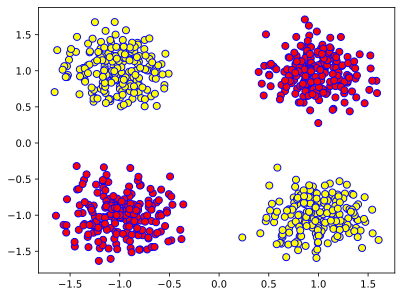

In [29]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=800,
    n_features=2,
    centers=np.array([
        [-1., -1.],
        [1., -1],
        [1., 1.],
        [-1., 1.],
    ]),
    cluster_std=0.25,
    random_state=RANDOM_SEED,
)
y[y == 2] = 0
y[y == 3] = 1

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn", edgecolors='b')

plt.show()

### Fitting a Decision Tree and Visualising the Decision Boundaries

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

Visualise the learned decision boundaries:

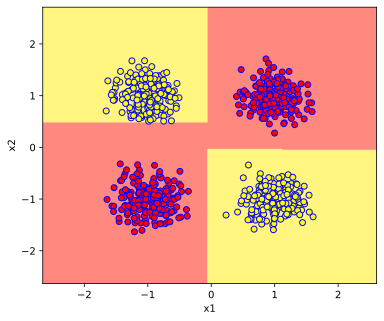

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))
DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        grid_resolution=300,
        cmap='autumn', # cmap=plt.cm.Pastel1,
        alpha=0.5,
        response_method="predict",
        ax=ax,
        xlabel="x1",
        ylabel="x2",
    )
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='b')
plt.show()

### Split Orientation

One quirk of many implementations of Decision Trees is that the decision boundaries are always parallel to the data axes, meaning that you will never see a diagonal line as a boundary between red and yellow in our case. They will always be horizontal or vertical.

**TASK: Reflect on why this is the case.**

To get more intuition you can study the next cell and its output. Change the value of the variable `angle` (in radians) to rotate our synthetic data and see the influence on the decision boundaries.

In [32]:
-np.pi / 12.334

-0.2547099605634663

In [49]:
# angle = -0.25
angle = -1.31

rot = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)],
])
X_rot = X @ rot

clf2 = DecisionTreeClassifier()
clf2.fit(X_rot, y)

DecisionTreeClassifier()

To determine the complexity of the decision boundary you can either plot the data and count horizontal/vertical lines, or use function `clf2.get_n_leaves()`:

In [50]:
print(clf2.get_n_leaves())

17


We define a helper function to plot the decision boundaries:

In [51]:
def plot_dec_boundaries(ax, clf, X, y):
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        grid_resolution=300,
        cmap='autumn',
        alpha=0.5,
        response_method="predict",
        ax=ax,
        xlabel="x1",
        ylabel="x2",
    )
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='b')

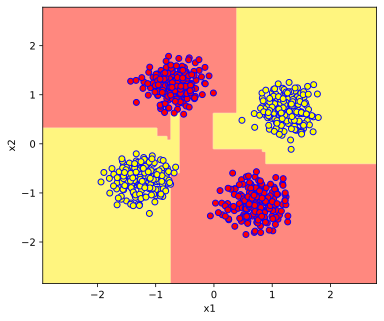

In [52]:
fig, ax = plt.subplots(figsize=(6, 5))
plot_dec_boundaries(ax, clf2, X_rot, y)
plt.show()

## 📢 **HAND-IN** 📢: Answer the following in **Moodle**
Which of the following angles (in radians) produces the highest number of leaf nodes for this data?
* 3.14
* -3.14
* 2.61
* -1.31

# Task 3: Random Forests (5 Points)

A Random Forest is a collection of Decision Trees. One reason to combine multiple Decision Trees into a Random Forest is to counteract the tendency of Decision Trees to overfit the data.  
First, we generate some synthetic data. You can see that this data set has $4$ classes that mix together a lot in the middle (around the origin).

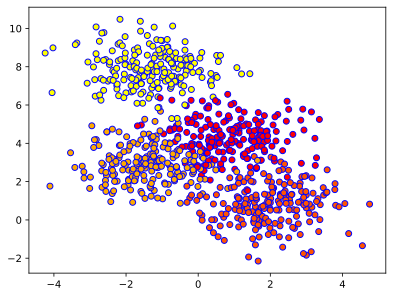

In [53]:
# we are using "_RF" for the variable names to not confuse/mix it with the data from the previous tasks

X_RF, y_RF = make_blobs(
    n_samples=800,
    n_features=2,
    random_state=0,
    centers=4,
    cluster_std=1.,
)

plt.scatter(X_RF[:, 0], X_RF[:, 1], c=y_RF, cmap='autumn', edgecolors='b')
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_RF, y_RF, random_state=RANDOM_SEED)

In the cells below, we train a single Decision Tree on a training dataset:

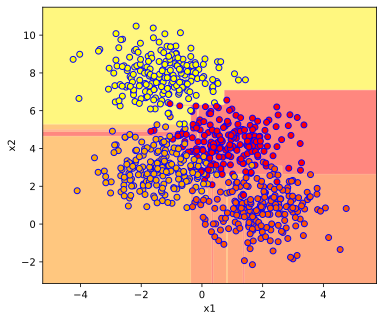

In [55]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(6, 5))

plot_dec_boundaries(ax, clf, X_RF, y_RF)

plt.show()

You should be able to see some odd artefacts in the decision regions, which indicate overfitting.

In the next cell we use the scikit learn Random Forest implementation.

To train a Random Forest, we train a collection of Decision Trees. Each tree is only trained on a subset (sampled with replacement) of the full training data. This is called **bootstrapping**.

To get a prediction from a Random Forest classifier, it computes the majority vote of all its constituent Decision Trees.

In [56]:
from sklearn.ensemble import RandomForestClassifier

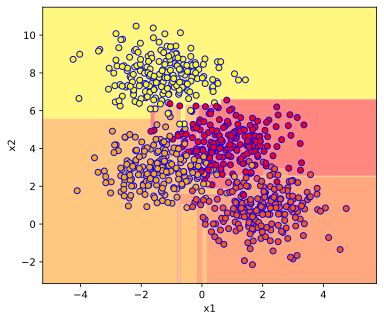

In [57]:
forest = RandomForestClassifier(n_estimators=1, max_samples=None, random_state=RANDOM_SEED)
forest.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 5))

plot_dec_boundaries(ax, forest, X_RF, y_RF)

plt.show()

**TASK 3:** Apply a cross validation grid search on the hyperparameters `n_estimators` and `max_samples`. Then train the model on the full training set using these hyperparameters, and measure its accuracy on the test set.

In [61]:
params = {
    "n_estimators":[2, 5, 10, 15, 30, 60, 120],
    "max_samples": [10, 50, 100, 200, 400]
    
}
forest = RandomForestClassifier(n_estimators=1, max_samples=None, random_state=RANDOM_SEED)


grid_search_forest = GridSearchCV(estimator=forest, cv=5, param_grid=params)

# Fit the GridSearchCV object to the training data
grid_search_forest.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params_forest = grid_search_forest.best_params_
best_model_forest = grid_search_forest.best_estimator_

y_pred_forest = best_model_forest.predict(X_test)
print(best_params_forest)
print(classification_report(y_test, y_pred_forest))

{'max_samples': 200, 'n_estimators': 60}
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.98      0.93      0.95        56
           2       0.89      0.93      0.91        45
           3       0.96      0.98      0.97        46

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



## 📢 **HAND-IN** 📢: Enter the following in **Moodle**

* Enter the final accuracy reached in **TASK 3**